In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# DATASET:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


This is the overall dataset having 40 columns and 1000 rows from which fraud reported is our target varaible. I can see here some column contain null values. Here column c39 shows only null values. So futher I will check and if there will no data, I will drop the column. We have more features here. We will have to train the using important features only.

In [3]:
df.shape

(1000, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


This the overall statistical inforamation about the data. some column contain categorical data also.according to me policy number column will not be useful for us.So I will drop that column.

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
df.drop_duplicates()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Here column _C39 contain only null values. and other columns are clean and does not contain any null values.

In [8]:
df.drop(['_c39','policy_number'],axis=1,inplace=True)
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


# DATA VISIUALIZATION:

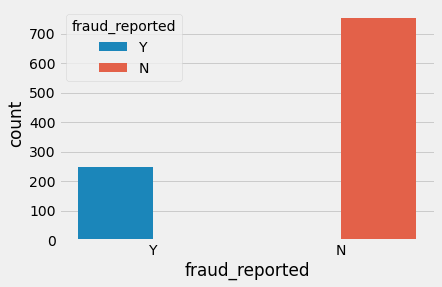

In [9]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

This the count for target variable data. which is imbalance. we will make it Balanced while processig.

In [10]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('*********************************************************')
        

policy_bind_date:['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-04

This the object data count for each column.

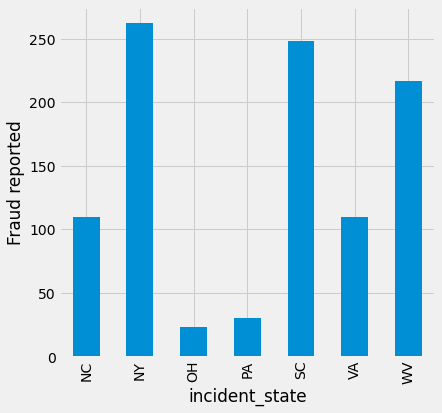

In [11]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(6,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

for the state NY SC AND WV have detected more fraud.

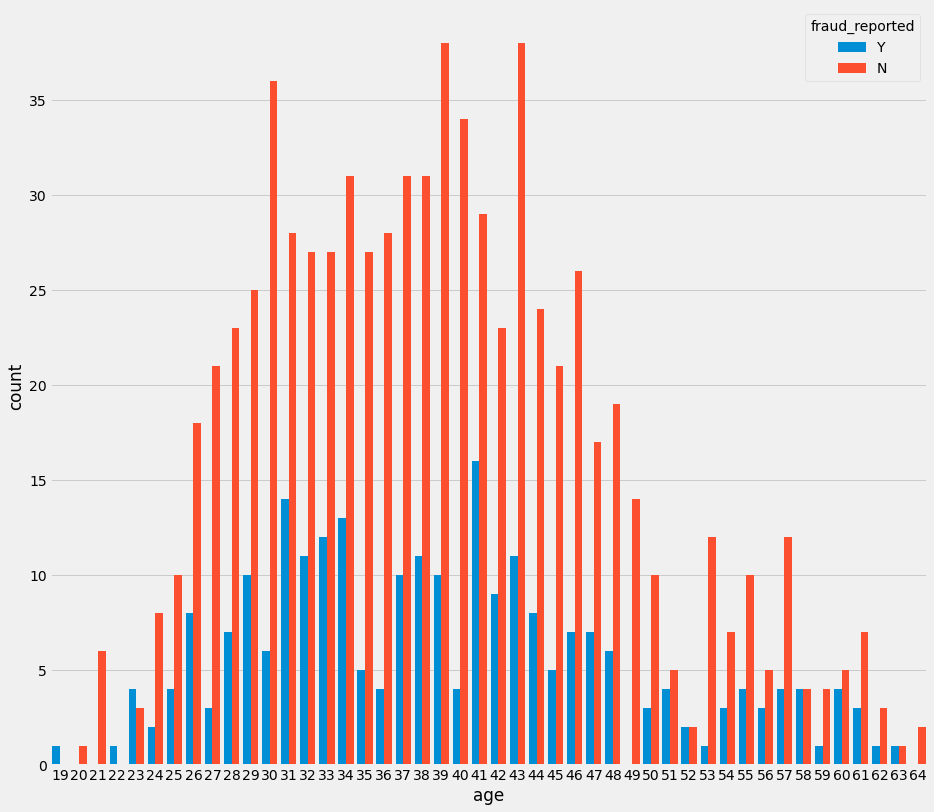

In [12]:
plt.figure(figsize=(14,13))
sns.countplot(df['age'], hue=df['fraud_reported'],saturation=1,)
plt.show()

for almost all type of age group frau is detected.

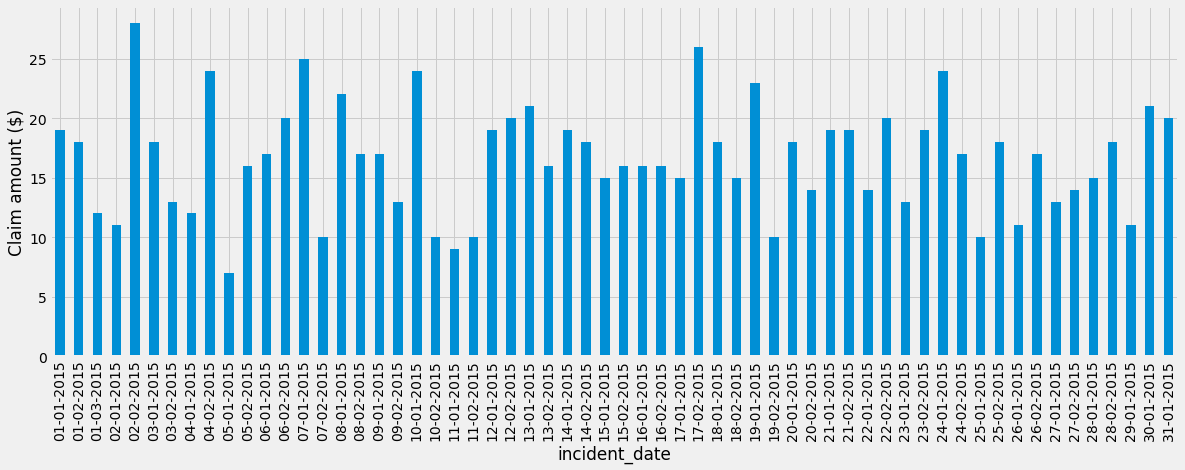

In [13]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

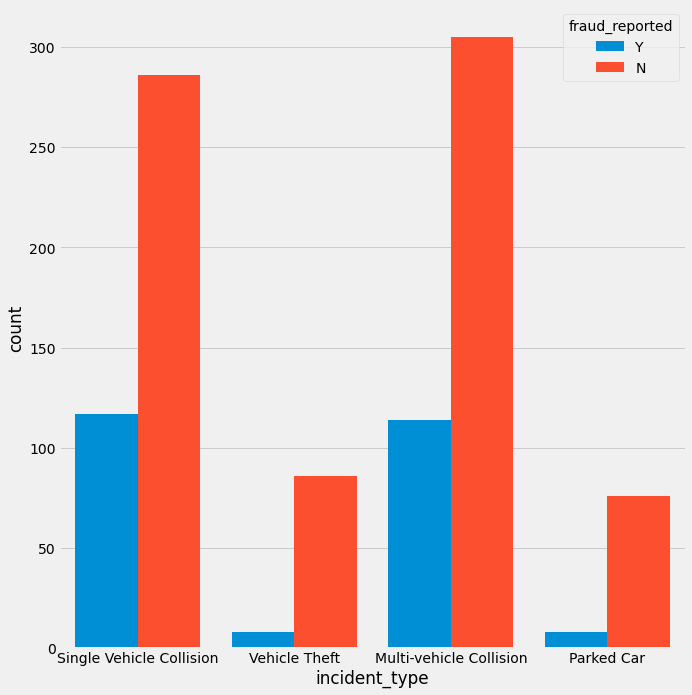

In [14]:
plt.figure(figsize=(10,11))
sns.countplot(df['incident_type'], hue=df['fraud_reported'],saturation=1,)
plt.show()

for single and multi-vehicle incident type fruad is more.

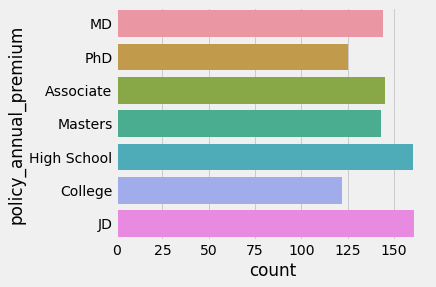

In [15]:
fig = plt.figure(figsize=(5,4))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()


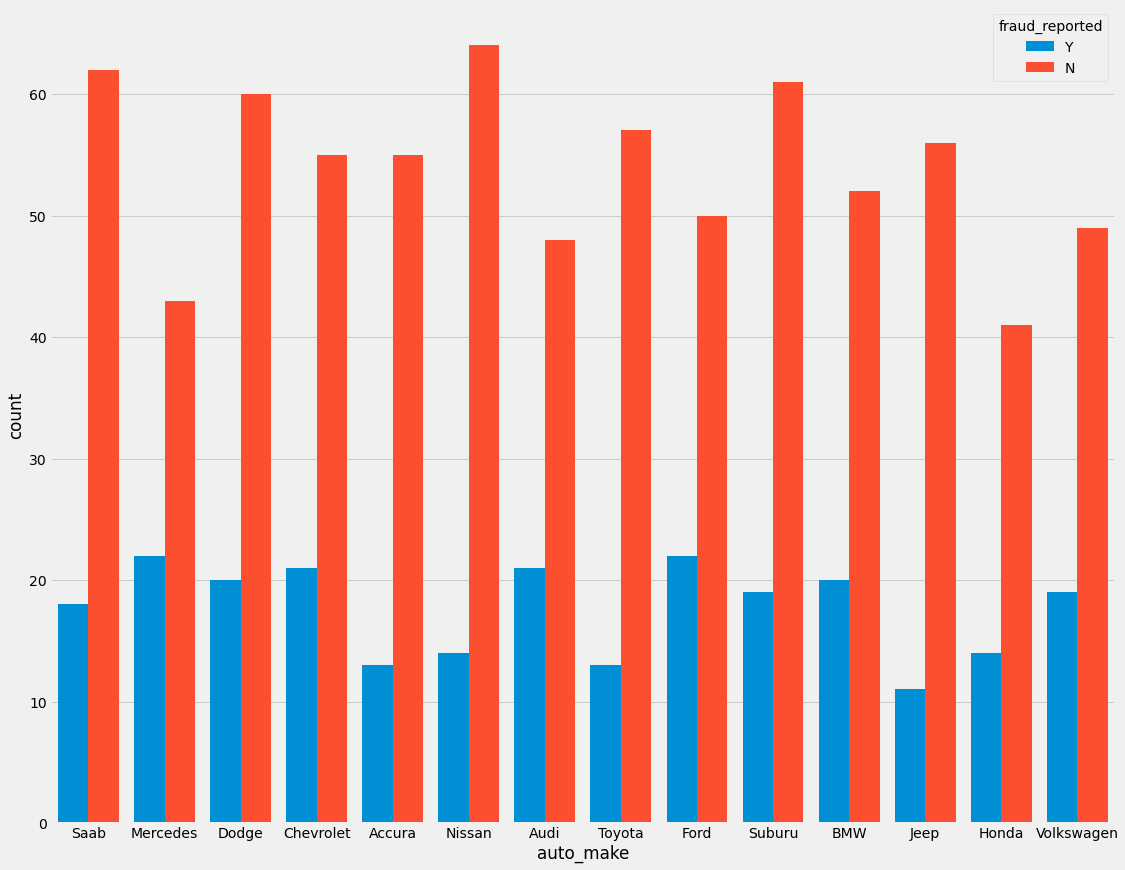

In [16]:
plt.figure(figsize=(17,14))
sns.countplot(df['auto_make'], hue=df['fraud_reported'],saturation=1,)
plt.show()

This the count for each vehicle for mercedes audi chevrolet,ford annd bmw fraud is detected more.

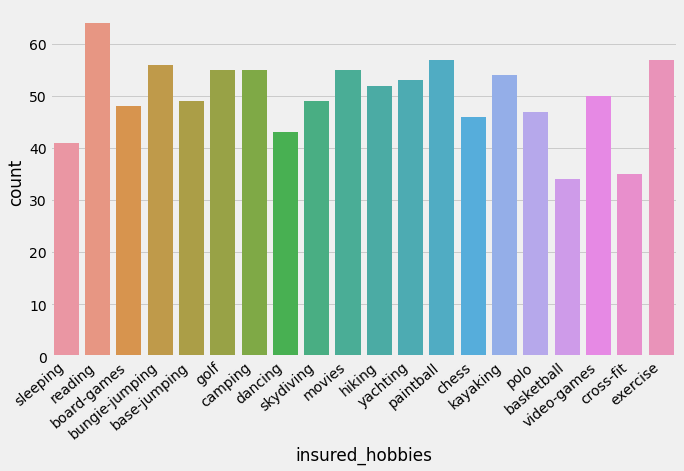

In [17]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

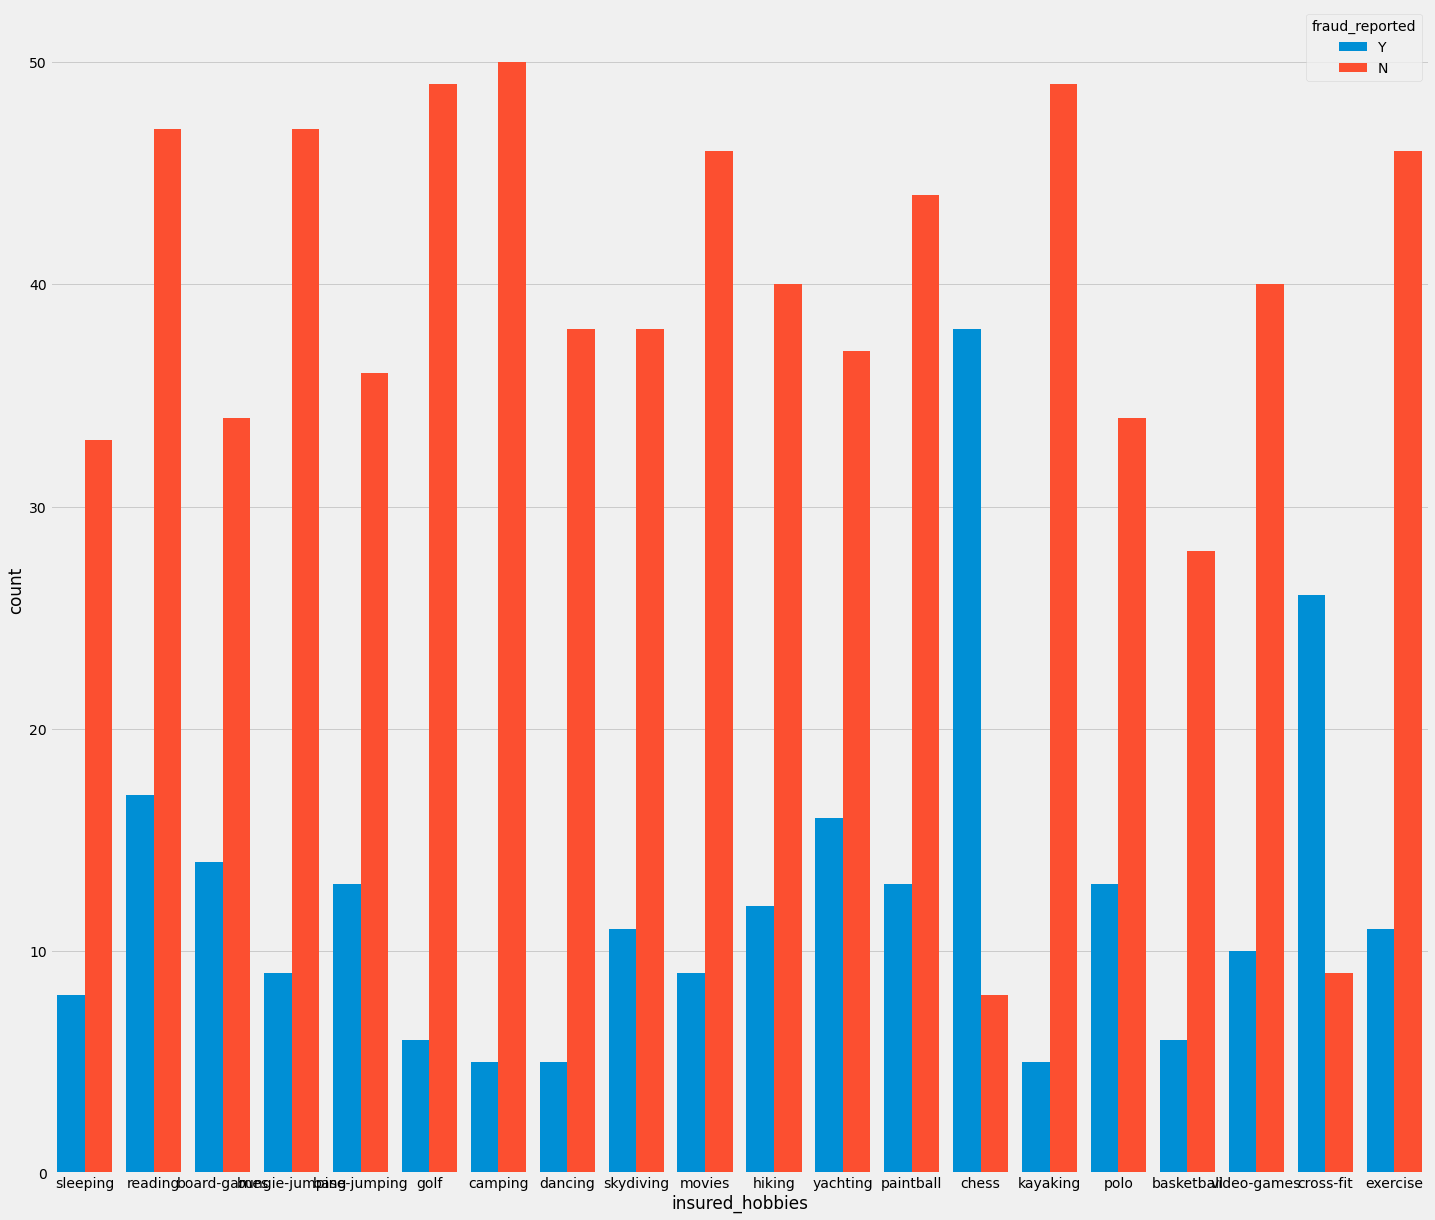

In [18]:
plt.figure(figsize=(22,20))
sns.countplot(df['insured_hobbies'], hue=df['fraud_reported'],saturation=1,)
plt.show()

insured persons who have hobby chess have detected fraud more than others.

## 

In [19]:
df = df.drop(columns = ['insured_zip','policy_bind_date','incident_date','incident_location','auto_year','incident_hour_of_the_day'],axis=1)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,YES,71610,6510,13020,52080,Saab,92x,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,0,?,5070,780,780,3510,Mercedes,E400,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,0,1,NO,6500,1300,650,4550,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,0,1,?,87200,17440,8720,61040,Honda,Accord,N
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,N
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,N
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,0,1,YES,46980,5220,5220,36540,Audi,A5,N


Here I have dropped unimportant columns. as this all columns does not affect on fruad detection anymore.

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [22]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,2,2,71610,6510,13020,52080,10,1,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,0,5070,780,780,3510,8,12,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,2,3,1,34650,7700,3850,23100,4,30,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,1,2,1,63400,6340,6340,50720,3,34,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,0,1,1,6500,1300,650,4550,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,0,5,2,...,0,1,0,87200,17440,8720,61040,6,6,0
996,285,41,0,0,1000,1436.79,0,0,6,9,...,2,3,0,108480,18080,18080,72320,13,28,0
997,130,34,2,1,500,1383.49,3000000,0,5,1,...,2,3,2,67500,7500,7500,52500,11,19,0
998,458,62,0,2,2000,1356.92,5000000,1,0,5,...,0,1,2,46980,5220,5220,36540,1,5,0


Here is the final dataset after converting numerical data into object.

In [23]:
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.060925,-0.000833,0.009814,...,-0.010162,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.073337,0.000969,0.017220,...,-0.015679,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,-0.020481,-0.034327,-0.031215,...,0.013384,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,-0.010757,0.009153,0.015788,...,-0.000595,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,-0.009733,0.015217,-0.046733,...,-0.022765,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.038853,-0.019715,0.035922,...,0.026780,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.010688,-0.019357,0.023422,...,0.022743,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.058622
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,1.000000,0.009002,-0.006160,...,-0.020297,0.042463,0.020864,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.009002,1.000000,-0.020298,...,-0.012072,0.019211,0.036141,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.008808
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.046733,0.035922,0.023422,-0.006160,-0.020298,1.000000,...,-0.000236,-0.014794,-0.011083,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,0.001564


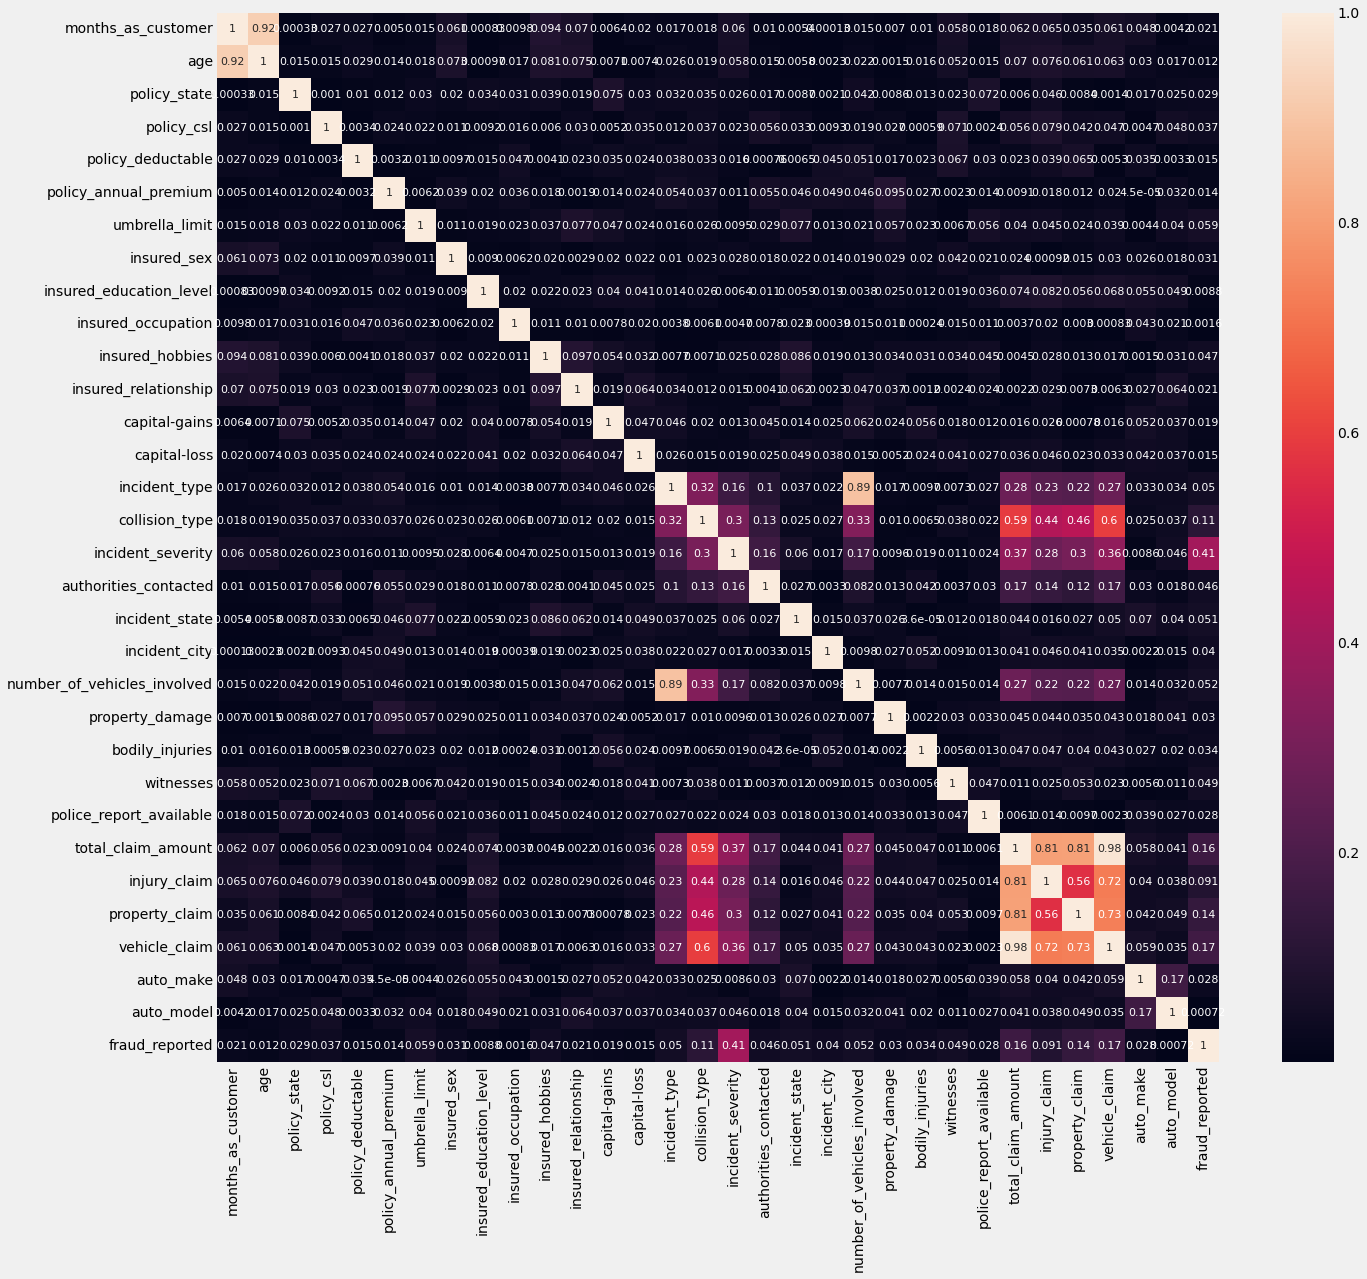

In [24]:
df_corr = df.corr().abs()

plt.figure(figsize =(20,18))
sns.heatmap(df_corr,annot = True, annot_kws={'size':11})
plt.show()

from above corelation heatmap I can see incident severity is highly corealted with fraud_reported.and Toal claim amount is also highly corelated with vehicle_claim,property_claim,injury_claim.

In [25]:
X = df.drop(['fraud_reported'],axis=1)
y= df['fraud_reported']
X

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,328,48,2,1,1000,1406.91,0,1,4,2,...,2,1,2,2,71610,6510,13020,52080,10,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,0,0,5070,780,780,3510,8,12
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,1,2,3,1,34650,7700,3850,23100,4,30
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,0,1,2,1,63400,6340,6340,50720,3,34
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,1,0,1,1,6500,1300,650,4550,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,0,5,2,...,2,0,1,0,87200,17440,8720,61040,6,6
996,285,41,0,0,1000,1436.79,0,0,6,9,...,2,2,3,0,108480,18080,18080,72320,13,28
997,130,34,2,1,500,1383.49,3000000,0,5,1,...,0,2,3,2,67500,7500,7500,52500,11,19
998,458,62,0,2,2000,1356.92,5000000,1,0,5,...,0,0,1,2,46980,5220,5220,36540,1,5


In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA()
pca.fit_transform(X_scaled)

array([[-1.25545044e+00,  1.28863232e+00, -1.23640971e+00, ...,
         1.56047857e-01, -3.83639359e-02, -2.80530051e-15],
       [ 3.97606273e+00,  7.11918226e-01, -2.83844034e-01, ...,
        -5.26271996e-01,  7.82781997e-02,  9.23273423e-15],
       [ 2.92268848e-01, -8.78971560e-01,  1.49190332e+00, ...,
        -6.02276670e-02, -3.07682349e-01, -1.23491317e-16],
       ...,
       [-1.37229570e+00, -7.80551052e-01,  1.21576261e+00, ...,
        -7.85686473e-02,  1.58144409e-01,  3.89336937e-16],
       [ 5.31423874e-01,  4.01890102e+00, -2.80600770e-01, ...,
         9.64155140e-02,  2.00110490e-01, -4.37095994e-16],
       [ 3.46286961e+00,  3.07835627e+00,  1.52161095e+00, ...,
         6.03101601e-01,  1.00885801e-01, -2.04053146e-16]])

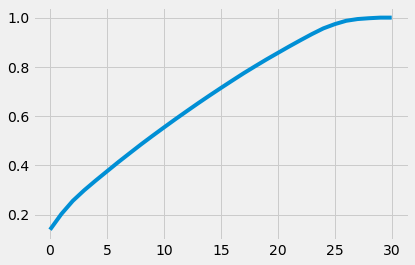

In [29]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

Here I have plotted PCA graph to get the no. of features to get highest accuracy. Her graph Shows 26 features could give 100% result.So. I will use 25 features to train the model.

In [30]:
pca = PCA(n_components=25)
new_pcomp = pca.fit_transform(X_scaled)
X_scaled = pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15',
                                             'PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25'])
X_scaled

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-1.255450,1.288632,-1.236410,-3.202879,-0.195120,-0.489067,-1.215773,0.607990,0.096500,-0.569287,...,1.350458,1.114118,-0.302277,-0.588823,-0.899148,1.174605,0.759609,-0.022795,-0.636885,0.626060
1,3.976063,0.711918,-0.283844,0.426199,-0.503545,0.520600,-0.783406,-0.151068,-1.215002,0.906211,...,-0.137010,1.524588,-2.218636,1.184438,0.664549,0.701443,-1.171252,-0.471937,-0.020247,0.632545
2,0.292269,-0.878972,1.491903,1.588575,0.831533,-1.214099,-0.136849,0.174535,1.059084,-0.256017,...,-1.263398,0.362463,0.411003,1.751662,-1.774090,-0.120488,-0.371398,0.375386,-0.395217,0.776336
3,-0.000918,1.018615,-0.928438,2.425524,2.380407,-0.403796,-0.794356,-0.412854,0.578855,1.127440,...,0.244979,0.989436,-0.251780,-0.431152,0.146894,-0.671225,0.691739,0.751580,-1.922025,1.478645
4,3.705305,1.246337,-0.290220,2.655702,-0.293158,0.099653,1.262616,1.005842,1.310325,1.804534,...,0.690802,1.614140,0.009099,-0.642365,1.416066,0.135468,1.790538,0.725096,-0.223009,0.813770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.461723,-1.272618,-2.377764,0.200029,-1.040361,-0.548394,-0.915651,0.408035,0.563142,0.657615,...,1.346554,-1.929242,-1.326625,-0.964771,-0.581098,0.528082,-0.959206,-1.623382,0.652662,-0.319485
996,-3.766340,0.733163,-2.595419,-0.903090,-0.080815,2.170733,-0.219927,-1.256147,0.221175,1.589681,...,-0.116590,-1.430824,1.759828,0.721282,-1.007866,1.575007,-0.110615,0.884603,-0.472925,-0.439034
997,-1.372296,-0.780551,1.215763,0.189497,1.026514,-2.489135,-0.214707,-1.193984,0.080865,-1.571321,...,0.766380,0.182103,0.719654,-0.412389,-1.464246,0.004396,0.940198,-0.112076,-1.328573,-0.355266
998,0.531424,4.018901,-0.280601,2.242118,-0.595041,-2.478659,-0.513396,0.905493,-0.131546,0.401740,...,0.353013,2.010247,-0.219043,-1.529457,1.923839,1.232297,0.643731,-0.146389,0.210142,1.311482


In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
SMOTE()

SMOTE()

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y)

In [34]:
from collections import Counter
ove_smp = SMOTE(0.75)
x_train_s,y_train_s = ove_smp.fit_resample(x_train,y_train)
print('the number of the classes before fit {}'.format(Counter(y_train)))
print('the number of the classes after fit {}'.format(Counter(y_train_s)))

the number of the classes before fit Counter({0: 566, 1: 184})
the number of the classes after fit Counter({0: 566, 1: 424})


Here I have used SMOTE to balance the target vraible count.

# MODEL BUILDING:

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
MaxAccu=0
MaxR=0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,random_state = i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    print('accuracy',acc,'random_state',i)
    
    if acc>MaxAccu:
        MaxAccu = acc
        MaxR=i
        print('accuracy',MaxAccu,'random_state',i)
   

accuracy 0.765 random_state 0
accuracy 0.765 random_state 0
accuracy 0.745 random_state 1
accuracy 0.79 random_state 2
accuracy 0.79 random_state 2
accuracy 0.785 random_state 3
accuracy 0.735 random_state 4
accuracy 0.77 random_state 5
accuracy 0.81 random_state 6
accuracy 0.81 random_state 6
accuracy 0.77 random_state 7
accuracy 0.765 random_state 8
accuracy 0.78 random_state 9
accuracy 0.8 random_state 10
accuracy 0.74 random_state 11
accuracy 0.79 random_state 12
accuracy 0.82 random_state 13
accuracy 0.82 random_state 13
accuracy 0.77 random_state 14
accuracy 0.8 random_state 15
accuracy 0.82 random_state 16
accuracy 0.78 random_state 17
accuracy 0.825 random_state 18
accuracy 0.825 random_state 18
accuracy 0.765 random_state 19
accuracy 0.805 random_state 20
accuracy 0.67 random_state 21
accuracy 0.82 random_state 22
accuracy 0.73 random_state 23
accuracy 0.765 random_state 24
accuracy 0.75 random_state 25
accuracy 0.805 random_state 26
accuracy 0.785 random_state 27
accuracy 0.7

In [37]:
print('Best Acuracy',MaxAccu,'Random State',MaxR)

Best Acuracy 0.84 Random State 65


In [38]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,random_state = 65,test_size = 0.20)
lr.fit(x_train,y_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.84
[[152   7]
 [ 25  16]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       159
           1       0.70      0.39      0.50        41

    accuracy                           0.84       200
   macro avg       0.78      0.67      0.70       200
weighted avg       0.83      0.84      0.82       200



In [39]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predt = dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,predt))
print(confusion_matrix(y_test,predt))
print(classification_report(y_test,predt))

Accuracy 0.67
[[124  35]
 [ 31  10]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       159
           1       0.22      0.24      0.23        41

    accuracy                           0.67       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.68      0.67      0.68       200



In [40]:
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier()
rt.fit(x_train,y_train)
prert = rt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prert))
print(confusion_matrix(y_test,prert))
print(classification_report(y_test,prert))

Accuracy 0.795
[[156   3]
 [ 38   3]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       159
           1       0.50      0.07      0.13        41

    accuracy                           0.80       200
   macro avg       0.65      0.53      0.51       200
weighted avg       0.74      0.80      0.73       200



In [41]:
from sklearn.svm import SVC

st = SVC()
st.fit(x_train,y_train)
prest = st.predict(x_test)
print('Accuracy',accuracy_score(y_test,prest))
print(confusion_matrix(y_test,prest))
print(classification_report(y_test,prest))

Accuracy 0.815
[[159   0]
 [ 37   4]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       159
           1       1.00      0.10      0.18        41

    accuracy                           0.81       200
   macro avg       0.91      0.55      0.54       200
weighted avg       0.85      0.81      0.75       200



In [42]:
from sklearn.ensemble import AdaBoostClassifier

at = AdaBoostClassifier()
at.fit(x_train,y_train)
preat = at.predict(x_test)
print('Accuracy',accuracy_score(y_test,preat))
print(confusion_matrix(y_test,preat))
print(classification_report(y_test,preat))


Accuracy 0.74
[[131  28]
 [ 24  17]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       159
           1       0.38      0.41      0.40        41

    accuracy                           0.74       200
   macro avg       0.61      0.62      0.61       200
weighted avg       0.75      0.74      0.74       200



In [43]:
from sklearn.ensemble import BaggingClassifier

bt = BaggingClassifier()
bt.fit(x_train,y_train)
prebt = bt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prebt))
print(confusion_matrix(y_test,prebt))
print(classification_report(y_test,prebt))


Accuracy 0.755
[[149  10]
 [ 39   2]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       159
           1       0.17      0.05      0.08        41

    accuracy                           0.76       200
   macro avg       0.48      0.49      0.47       200
weighted avg       0.66      0.76      0.70       200



In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
prekt = knn.predict(x_test)
print('Accuracy',accuracy_score(y_test,prekt))
print(confusion_matrix(y_test,prekt))
print(classification_report(y_test,prekt))


Accuracy 0.725
[[140  19]
 [ 36   5]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       159
           1       0.21      0.12      0.15        41

    accuracy                           0.73       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.68      0.72      0.70       200



In [45]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_train,y_train)
prext = knn.predict(x_test)
print('Accuracy',accuracy_score(y_test,prext))
print(confusion_matrix(y_test,prext))
print(classification_report(y_test,prext))


Accuracy 0.725
[[140  19]
 [ 36   5]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       159
           1       0.21      0.12      0.15        41

    accuracy                           0.73       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.68      0.72      0.70       200



from all the above model reports I can see LogisticRegression and SVC are giving good accuracy which is 81% and 83% where for SVC True Negev=tive rate is also O.So I will check cross validation scores for this two models.

# CROSS VALIDATION:

In [57]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,X_scaled,y,cv=9)
print("Cross Validation Score for Logistic Classification Model is:-",scr.mean())

Cross Validation Score for Logistic Classification Model is:- 0.778993278993279


In [78]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(st,X_scaled,y,cv=2)
print("Cross Validation Score for SVC Model is:-",scr.mean())

Cross Validation Score for SVC Model is:- 0.75


In [64]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rt,X_scaled,y,cv=2)
print("Cross Validation Score for Random Forest Model is:-",scr.mean())

Cross Validation Score for Random Forest Model is:- 0.757


# HYPERPARAMETER TUNING:

In [66]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C' : np.logspace(-4, 4, 20),
             'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
             'max_iter' : [100, 1000,2500, 5000]}]
    


In [67]:
GCV = GridSearchCV(LogisticRegression(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'C': 0.08858667904100823, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [68]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [69]:
GCV.best_estimator_

LogisticRegression(C=0.08858667904100823, penalty='l1', solver='saga')

In [70]:
GCV_pred = GCV.best_estimator_.predict(x_test)
print(accuracy_score(y_test,GCV_pred))
print(confusion_matrix(y_test,GCV_pred))

0.81
[[156   3]
 [ 35   6]]


<function matplotlib.pyplot.show(close=None, block=None)>

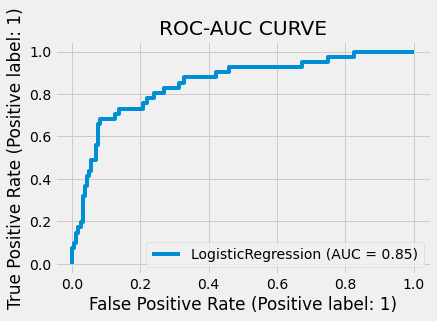

In [71]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC-AUC CURVE')
plt.show

# Hyperparameter Tuning for SVC:-

In [72]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
    
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.738 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.744 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [73]:
print(grid.best_params_)
 

print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


In [74]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [75]:
grid_predictions = grid.predict(x_test)
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       159
           1       0.00      0.00      0.00        41

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.63      0.80      0.70       200

[[159   0]
 [ 41   0]]


<function matplotlib.pyplot.show(close=None, block=None)>

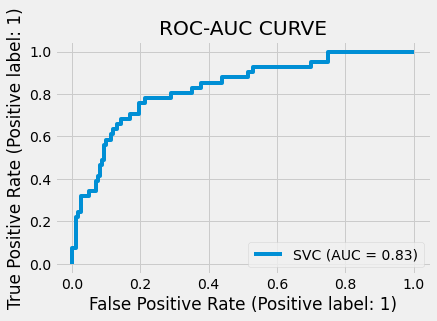

In [76]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid.best_estimator_,x_test,y_test)
plt.title('ROC-AUC CURVE')
plt.show

Here afterapplying hyperparameter and plotting roc curve SVC is giving best results as for svc accuracy is 80%, and 
False positive and False negetive rates are 0. So this would be the best model.

In [80]:
import pickle
file = open('InsuranceClaim.pkl', 'wb')
pickle.dump(grid.best_estimator_, file)
model=open('InsuranceClaim.pkl', 'rb')
InsuranceCliam_moel=pickle.load(model)